In [24]:
import pandas as pd
from seaborn import heatmap

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "4"

import torch
import numpy as np
import pickle as pk

from tqdm import tqdm_notebook
from sklearn.metrics import cohen_kappa_score
from fastai.vision import *
from torch.nn import functional as F
from utils import *

In [2]:
current_time = get_BJ_time()
print(current_time)

0824_17-01-06


In [3]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
SEED = 2019
seed_everything(SEED)

deployment_dir = "../output/inference"

def qk(y_pred, y):
    k = torch.tensor(cohen_kappa_score(torch.round(y_pred), y, weights='quadratic'), device='cuda:0')
    k[k != k] = 0
    k[torch.isinf(k)] = 0
    
    return k

df_2019_cv = pd.read_csv('../input/aptos-data-split/df_2019_cv.csv')

In [4]:
df_2019_cv.head()

,id_code,diagnosis,path,is_valid1,is_valid2,is_valid3,is_valid4,is_valid5
0,000c1434d8d7,2,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
1,001639a390f0,4,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
2,0024cdab0c1e,1,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
3,002c21358ce6,0,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False
4,005b95c28852,0,../input/aptos2019-blindness-detection/train_i...,True,False,False,False,False


In [5]:
test_df = pd.read_csv('../input/aptos2019-blindness-detection/sample_submission.csv')

# Feature Extraction

## Train Feature

### b3

In [ ]:
fold = 1
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f1.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b3_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 2
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f2.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b3_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 3
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f3.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b3_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 4
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0819_22-37-22_stage2_f4.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b3_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 5
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b3_0820_05-48-25_stage2_f5.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b3_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

### b4

In [ ]:
fold = 1
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f1.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b4_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 2
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f2.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b4_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 3
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f3.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b4_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 4
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0820_01-09-57_stage2_f4.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b4_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 5
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b4_0821_00-02-25_stage2_f5.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b4_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

### b5

In [ ]:
fold = 1
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0820_01-32-30_stage2_f1.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b5_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 2
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0820_22-13-07_stage2_f2.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b5_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 3
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0820_22-13-07_stage2_f3.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b5_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 4
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0821_01-30-37_stage2_f4.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b5_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

fold = 5
val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]

learn = load_learner(deployment_dir, "efficientnet-b5_0821_00-26-51_stage2_f5.pkl")

learn.data.add_test(ImageList.from_df(val_df,
                                      '../input/aptos2019-blindness-detection',
                                      cols="id_code",
                                      folder='train_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)
        
        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
np.save("../output/stacking/b5_f{}_feats.npy".format(fold), feats_arr)

print(feats_arr.shape)

## Test Feature

### Average

#### b3

In [102]:
b3_models = ["efficientnet-b3_0819_22-37-22_stage2_f1", "efficientnet-b3_0819_22-37-22_stage2_f2", 
             "efficientnet-b3_0819_22-37-22_stage2_f3", "efficientnet-b3_0819_22-37-22_stage2_f4",
            "efficientnet-b3_0820_05-48-25_stage2_f5"]

b3_test_feats_list = []
for m in tqdm_notebook(b3_models):
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing',
                                      suffix='.png'))

    learn.model.eval()
    with torch.no_grad():
        feats_list = []
        for xb,yb in tqdm_notebook(learn.data.test_dl):
            # Convolution layers
            x = learn.model.extract_features(xb)

            # Pooling and final linear layer
            feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
            feats = feats.cpu().numpy()
            feats_list.append(feats)
            
    feats_arr = np.concatenate(feats_list, axis=0)
    b3_test_feats_list.append(feats_arr)
    
b3_test_feats = np.average(b3_test_feats, axis=0)
np.save("../output/stacking/b3_test_feats.npy", b3_test_feats)
# print(b3_test_feats.shape)

#### b4

In [103]:
b4_models = ["efficientnet-b4_0820_01-09-57_stage2_f1", "efficientnet-b4_0820_01-09-57_stage2_f2", 
             "efficientnet-b4_0820_01-09-57_stage2_f3", "efficientnet-b4_0820_01-09-57_stage2_f4",
            "efficientnet-b4_0821_00-02-25_stage2_f5"]

b4_test_feats_list = []
for m in tqdm_notebook(b4_models):
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

    learn.model.eval()
    with torch.no_grad():
        feats_list = []
        for xb,yb in tqdm_notebook(learn.data.test_dl):
            # Convolution layers
            x = learn.model.extract_features(xb)

            # Pooling and final linear layer
            feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
            feats = feats.cpu().numpy()
            feats_list.append(feats)
            
    feats_arr = np.concatenate(feats_list, axis=0)
    b4_test_feats_list.append(feats_arr)
    
b4_test_feats = np.average(b4_test_feats, axis=0)
np.save("../output/stacking/b4_test_feats.npy", b4_test_feats)

# print(b4_test_feats.shape)

#### b5

In [113]:
b5_models = ["efficientnet-b5_0820_01-32-30_stage2_f1", "efficientnet-b5_0820_22-13-07_stage2_f2", 
             "efficientnet-b5_0820_22-13-07_stage2_f3", "efficientnet-b5_0821_01-30-37_stage2_f4",
            "efficientnet-b5_0821_00-26-51_stage2_f5"]

b5_test_feats_list = []
for m in tqdm_notebook(b5_models):
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

    learn.model.eval()
    with torch.no_grad():
        feats_list = []
        for xb,yb in tqdm_notebook(learn.data.test_dl):
            # Convolution layers
            x = learn.model.extract_features(xb)

            # Pooling and final linear layer
            feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
            feats = feats.cpu().numpy()
            feats_list.append(feats)
            
    feats_arr = np.concatenate(feats_list, axis=0)
    b5_test_feats_list.append(feats_arr)
    
b5_test_feats = np.average(b5_test_feats, axis=0)
np.save("../output/stacking/b5_test_feats.npy", b5_test_feats)

# print(b5_test_feats.shape)

In [112]:
b5_test_feats_list.shape

(2048,)

### Retrain

#### b3

In [116]:
b3_test_feats = []
learn = load_learner(deployment_dir, "efficientnet-b3_0823_05-02-32_stage2_whole.pkl")

learn.data.add_test(ImageList.from_df(test_df,
                                  '../input/aptos2019-blindness-detection',
                                  folder='test_images_ben_preprocessing',
                                  suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)

        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)
            
feats_arr = np.concatenate(feats_list, axis=0)
#     b3_test_feats.append(feats_arr)
    
# b3_test_feats = np.average(b3_test_feats, axis=0)
np.save("../output/stacking/b3_retrain_test_feats.npy", b3_test_feats)
b3_test_feats = feats_arr
print(b3_test_feats.shape)

(1928, 1536)


#### b4

In [117]:
b4_test_feats = []
learn = load_learner(deployment_dir, "efficientnet-b4_0823_18-14-19_stage2_whole.pkl")

learn.data.add_test(ImageList.from_df(test_df,
                                  '../input/aptos2019-blindness-detection',
                                  folder='test_images_ben_preprocessing_sigmaX10',
                                  suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)

        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
b4_test_feats = feats_arr
    
np.save("../output/stacking/b4_retrain_test_feats.npy", b4_test_feats)

print(b4_test_feats.shape)

(1928, 1792)


#### b5

In [118]:
b5_test_feats = []
learn = load_learner(deployment_dir, "efficientnet-b5_0823_18-21-16_stage2_whole.pkl")

learn.data.add_test(ImageList.from_df(test_df,
                                  '../input/aptos2019-blindness-detection',
                                  folder='test_images_ben_preprocessing_sigmaX10',
                                  suffix='.png'))

learn.model.eval()
with torch.no_grad():
    feats_list = []
    for xb,yb in tqdm_notebook(learn.data.test_dl):
        # Convolution layers
        x = learn.model.extract_features(xb)

        # Pooling and final linear layer
        feats = F.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        feats = feats.cpu().numpy()
        feats_list.append(feats)

feats_arr = np.concatenate(feats_list, axis=0)
b5_test_feats = feats_arr
    
np.save("../output/stacking/b5_retrain_test_feats.npy", b5_test_feats)

print(b5_test_feats.shape)

(1928, 2048)


In [119]:
X_test = np.concatenate([b3_test_feats, b4_test_feats, b5_test_feats], axis=1)
# X_test = np.concatenate([b4_test_feats, b5_test_feats], axis=1)
X_test.shape

(1928, 5376)

# Train Stage 2 model on OOF

## LightGBM 

In [8]:
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler

In [9]:
def qk_np(y, y_pred):
    k = cohen_kappa_score(np.round(y_pred), y, weights='quadratic')
    
    return k

score = make_scorer(qk_np, greater_is_better=True)

In [32]:
stacking_dir = "../output/stacking"
X_train = []
y_train = []
n_fold = 5

for i in range(1, n_fold+1):
    data_t = []
    for j in ['b3_f{}_feats.npy', 'b4_f{}_feats.npy', 'b5_f{}_feats.npy']:
#     for j in ['b4_f{}_feats.npy', 'b5_f{}_feats.npy']:
        data_t.append(np.load(os.path.join(stacking_dir, j.format(i))))
    data_t = np.concatenate(data_t, axis=1)
    X_train.append(data_t)
    
    label_t = df_2019_cv[df_2019_cv["is_valid{}".format(i)]]["diagnosis"].tolist()
    y_train += label_t
    
X_train = np.concatenate(X_train, axis=0)
print(X_train.shape)

(3662, 5376)


In [88]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

In [ ]:
X_train_normalized = F.softmax(torch.tensor(X_train)).numpy()

In [33]:
estimator = lgb.LGBMRegressor(n_jobs=8, random_state=SEED)

param_grid = {
#     'max_depth': [15, 20, 25, 30, 35],   
    'max_depth': [20],
#     'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],    
    'learning_rate': [0.1],
#     'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#     'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#     'bagging_freq': [2, 4, 5, 6, 8],
#     'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
#     'lambda_l2': [0, 10, 15, 35, 40],
#     'cat_smooth': [1, 10, 15, 20, 35]
}

gbm = GridSearchCV(estimator, param_grid, cv=5, n_jobs=16, scoring=score, verbose=1)
# gbm.fit(X_train_normalized, y_train)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:   29.2s finished


Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 20}


In [34]:
gbm.cv_results_   

{'mean_fit_time': array([26.503971]),
 'std_fit_time': array([0.53958]),
 'mean_score_time': array([0.014936]),
 'std_score_time': array([0.004083]),
 'param_learning_rate': masked_array(data=[0.1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[20],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'max_depth': 20}],
 'split0_test_score': array([0.927655]),
 'split1_test_score': array([0.924255]),
 'split2_test_score': array([0.922097]),
 'split3_test_score': array([0.914574]),
 'split4_test_score': array([0.912803]),
 'mean_test_score': array([0.92028]),
 'std_test_score': array([0.005692]),
 'rank_test_score': array([1], dtype=int32)}

In [35]:
model_save_name = os.path.join(deployment_dir, "lightgbm-{}.pkl".format(current_time))

with open(model_save_name, "wb") as f:
    pk.dump(gbm.best_estimator_, f)

print(model_save_name)

../output/inference/lightgbm-0824_17-01-06.pkl


In [ ]:
with open(model_save_name, "rb") as f:
    gbm = pk.load(f)

## LogisticRegression 

In [47]:
from sklearn.linear_model import LogisticRegression

In [96]:
estimator = LogisticRegression(n_jobs=8, random_state=SEED, multi_class="auto")

param_grid = {
#     'penalty': ['l1', 'l2'],    
    'penalty': ['l2'],
    'C': [0.1],    
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']
#     'C': [0.001, 0.01, 0.1, 1, 10, 100]

}

lr = GridSearchCV(estimator, param_grid, cv=5, n_jobs=16, scoring=score, verbose=1)
lr.fit(X_train, y_train)
# lr.fit(X_train_normalized, y_train)


print('Best parameters found by grid search are:', lr.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:  4.6min remaining:  4.6min
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:  6.6min finished


Best parameters found by grid search are: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [97]:
lr.cv_results_   

{'mean_fit_time': array([292.200948, 277.65664 , 388.242563,  24.270948]),
 'std_fit_time': array([22.441194,  6.371762,  4.092036,  4.390133]),
 'mean_score_time': array([0.040252, 0.08123 , 0.031822, 0.053818]),
 'std_score_time': array([0.015878, 0.021969, 0.010026, 0.035091]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['newton-cg', 'sag', 'saga', 'lbfgs'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'},
  {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'},
  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'},
  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}],
 'split0_test_s

In [98]:
qk_np(y_train, lr.predict(X_train))

0.9329582729509046

In [86]:
model_save_name = "lr-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
    pk.dump(lr.best_estimator_, f)

print(model_save_name)

lr-0824_17-01-06


# Test

In [ ]:
X_test_normalized = scaler.transform(X_test)

In [ ]:
X_test_normalized = F.softmax(torch.tensor(X_test)).numpy()

## LogisticRegression 

### Retrain feature test

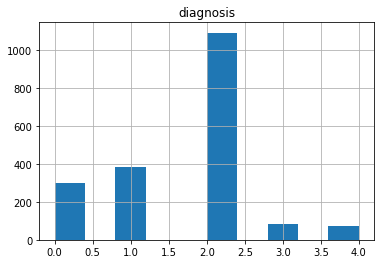

lr-0824_17-01-06-retrain_feature_test.csv


In [120]:
y_pred = lr.predict(X_test)


test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-retrain_feature_test.csv".format(model_save_name)
test_df.to_csv(submition_filename,index=False)
print(submition_filename)

### 5-fold avg feature test

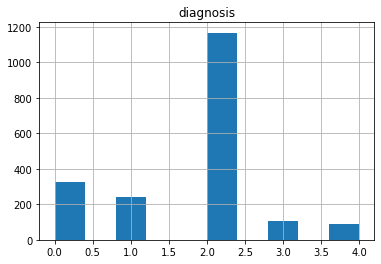

lr-0824_17-01-06-5-fold_avg_logits_test.csv


In [115]:

b3_test_avg_feats = np.average(b3_test_feats_list, axis=0)
b4_test_avg_feats = np.average(b4_test_feats_list, axis=0)
b5_test_avg_feats = np.average(b5_test_feats_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = lr.predict(X_test)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

### 5-fold avg logits test

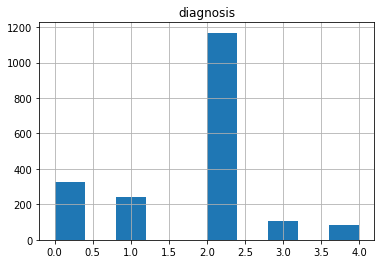

lr-0824_17-01-06-5-fold_avg_logits_test.csv


In [114]:
# 5 test feature then avg
results = []
for b3, b4, b5 in zip(b3_test_feats_list, b4_test_feats_list, b5_test_feats_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = lr.predict_proba(X_test)
    results.append(res)

avg_res = np.average(results, axis=0)
y_pred = np.argmax(avg_res, axis=1)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)